# **Capstone project: Providing data-driven suggestions for HR**

### Project scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, want data-driven suggestions based on exploration of the data. They have the following question: what’s likely to make the employee leave the company?

In this project the data collected by the HR department is analysed, and a model is built that predicts whether or not an employee will leave the company.

By predicting if employees are likely to quit, factors that contribute to their leaving are identified. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Background on the HR dataset

The dataset used in this project contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset

### Import packages

In [92]:
# Import packages

# For outputs of multiple lines to be shown

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Standard EDA packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For predictive models

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier
from xgboost import plot_importance

### Load dataset

In [93]:
# Load dataset into a dataframe
url = 'https://github.com/Montichiari/Employee-Turnover-Data-Analysis-and-Prediction-Model-Project/blob/main/HR_capstone_dataset.csv?raw=true'
hrdata = pd.read_csv(url)

# Looking at first few rows of dataframe
hrdata.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understanding the variables
- Cleaning dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [94]:
# Gather basic information about the data
hrdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [95]:
# Gather descriptive statistics about the data

hrdata.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

In [96]:
# Display all column names

hrdata.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [97]:
# Rename columns as needed

hrdata = hrdata.rename(columns={'Department': 'department', 'Work_accident': 'work_accident', 'time_spend_company': 'tenure', 'average_montly_hours': 'average_monthly_hours'})


# Display all column names after the update

hrdata.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [98]:
# Check for missing values

hrdata.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [99]:
# Check for duplicates

duplicates = hrdata.duplicated()


In [100]:
# Inspect some rows containing duplicates as needed

duplicate_rows = hrdata[duplicates]
duplicate_rows.head(10)

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
1516                 0.40             0.50               2   
1616                 0.37             0.46               2   
1696                 0.39             0.56               2   
1833                 0.10             0.85               6   
12000                0.38             0.53               2   

       average_monthly_hours  tenure  work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461                     142       3              0     1   
1516                     127       3              0     1   
1616                     156       3              0     1   
1696                     160       3              0     1   
1833                     266       4              0     1   
12000                    157       3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
1516                       0          IT     low  
1616                       0       sales     low  
1696                       0       sales     low  
1833                       0       sales     low  
12000                      0       sales     low

In [101]:
duplicate_rows.shape

(3008, 10)

In [102]:
# Dropping duplicates

hrdata_nodups = hrdata.drop_duplicates()
hrdata_nodups.shape


(11991, 10)

In [103]:
# Checking unique entries for department and salary

hrdata_nodups['department'].unique()
hrdata_nodups['salary'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

array(['low', 'medium', 'high'], dtype=object)

### Check outliers

Check for outliers in the data.

Text(0.5, 0, 'Years')

Text(0.5, 1.0, 'Tenure of surveyed employees')

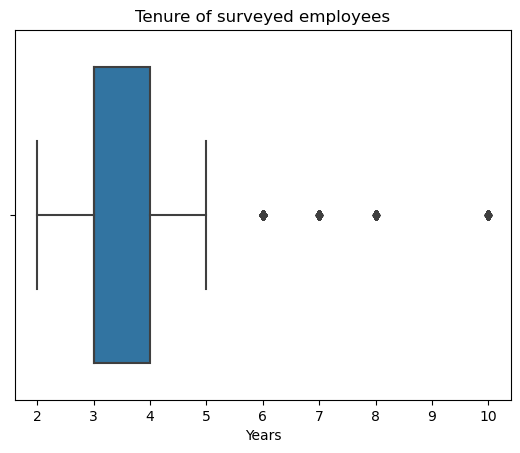

In [104]:
box = sns.boxplot(x = hrdata_nodups['tenure'])
box.set_xlabel('Years')
box.set_title('Tenure of surveyed employees')

In [105]:
# Determine the number of rows containing outliers

q1 = hrdata_nodups['tenure'].quantile(0.25)
q3 = hrdata_nodups['tenure'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = hrdata_nodups[(hrdata_nodups['tenure'] < lower) | (hrdata_nodups['tenure'] > upper)]
print("Outliers:")
print(len(outliers))

Outliers:
824


## Step 2. Data Exploration (Continue EDA)

### Exploring relationships between variables

In [106]:
#Checking to see how many employees in the survey had left, and how many are still employed
hrdata_nodups[hrdata_nodups['left'] == 0].shape
hrdata_nodups[hrdata_nodups['left'] == 1].shape


(10000, 10)

(1991, 10)

In [107]:
#Creating new subsets of those who left and those who remained
hrdata_left = hrdata_nodups[hrdata_nodups['left'] == 1]
hrdata_stay = hrdata_nodups[hrdata_nodups['left'] == 0]

In [108]:
# Calculating percentage of those who left and stayed

leftpercent = len(hrdata_left) / len(hrdata_nodups) * 100
print('Percent of employees who left: ')
print(leftpercent)

staypercent = len(hrdata_stay) / len(hrdata_nodups) * 100
print('Percent of employees who stayed: ')
print(staypercent)


Percent of employees who left: 
16.604119756484028
Percent of employees who stayed: 
83.39588024351598


## Using pairplots and heatmap to see if there are relationships

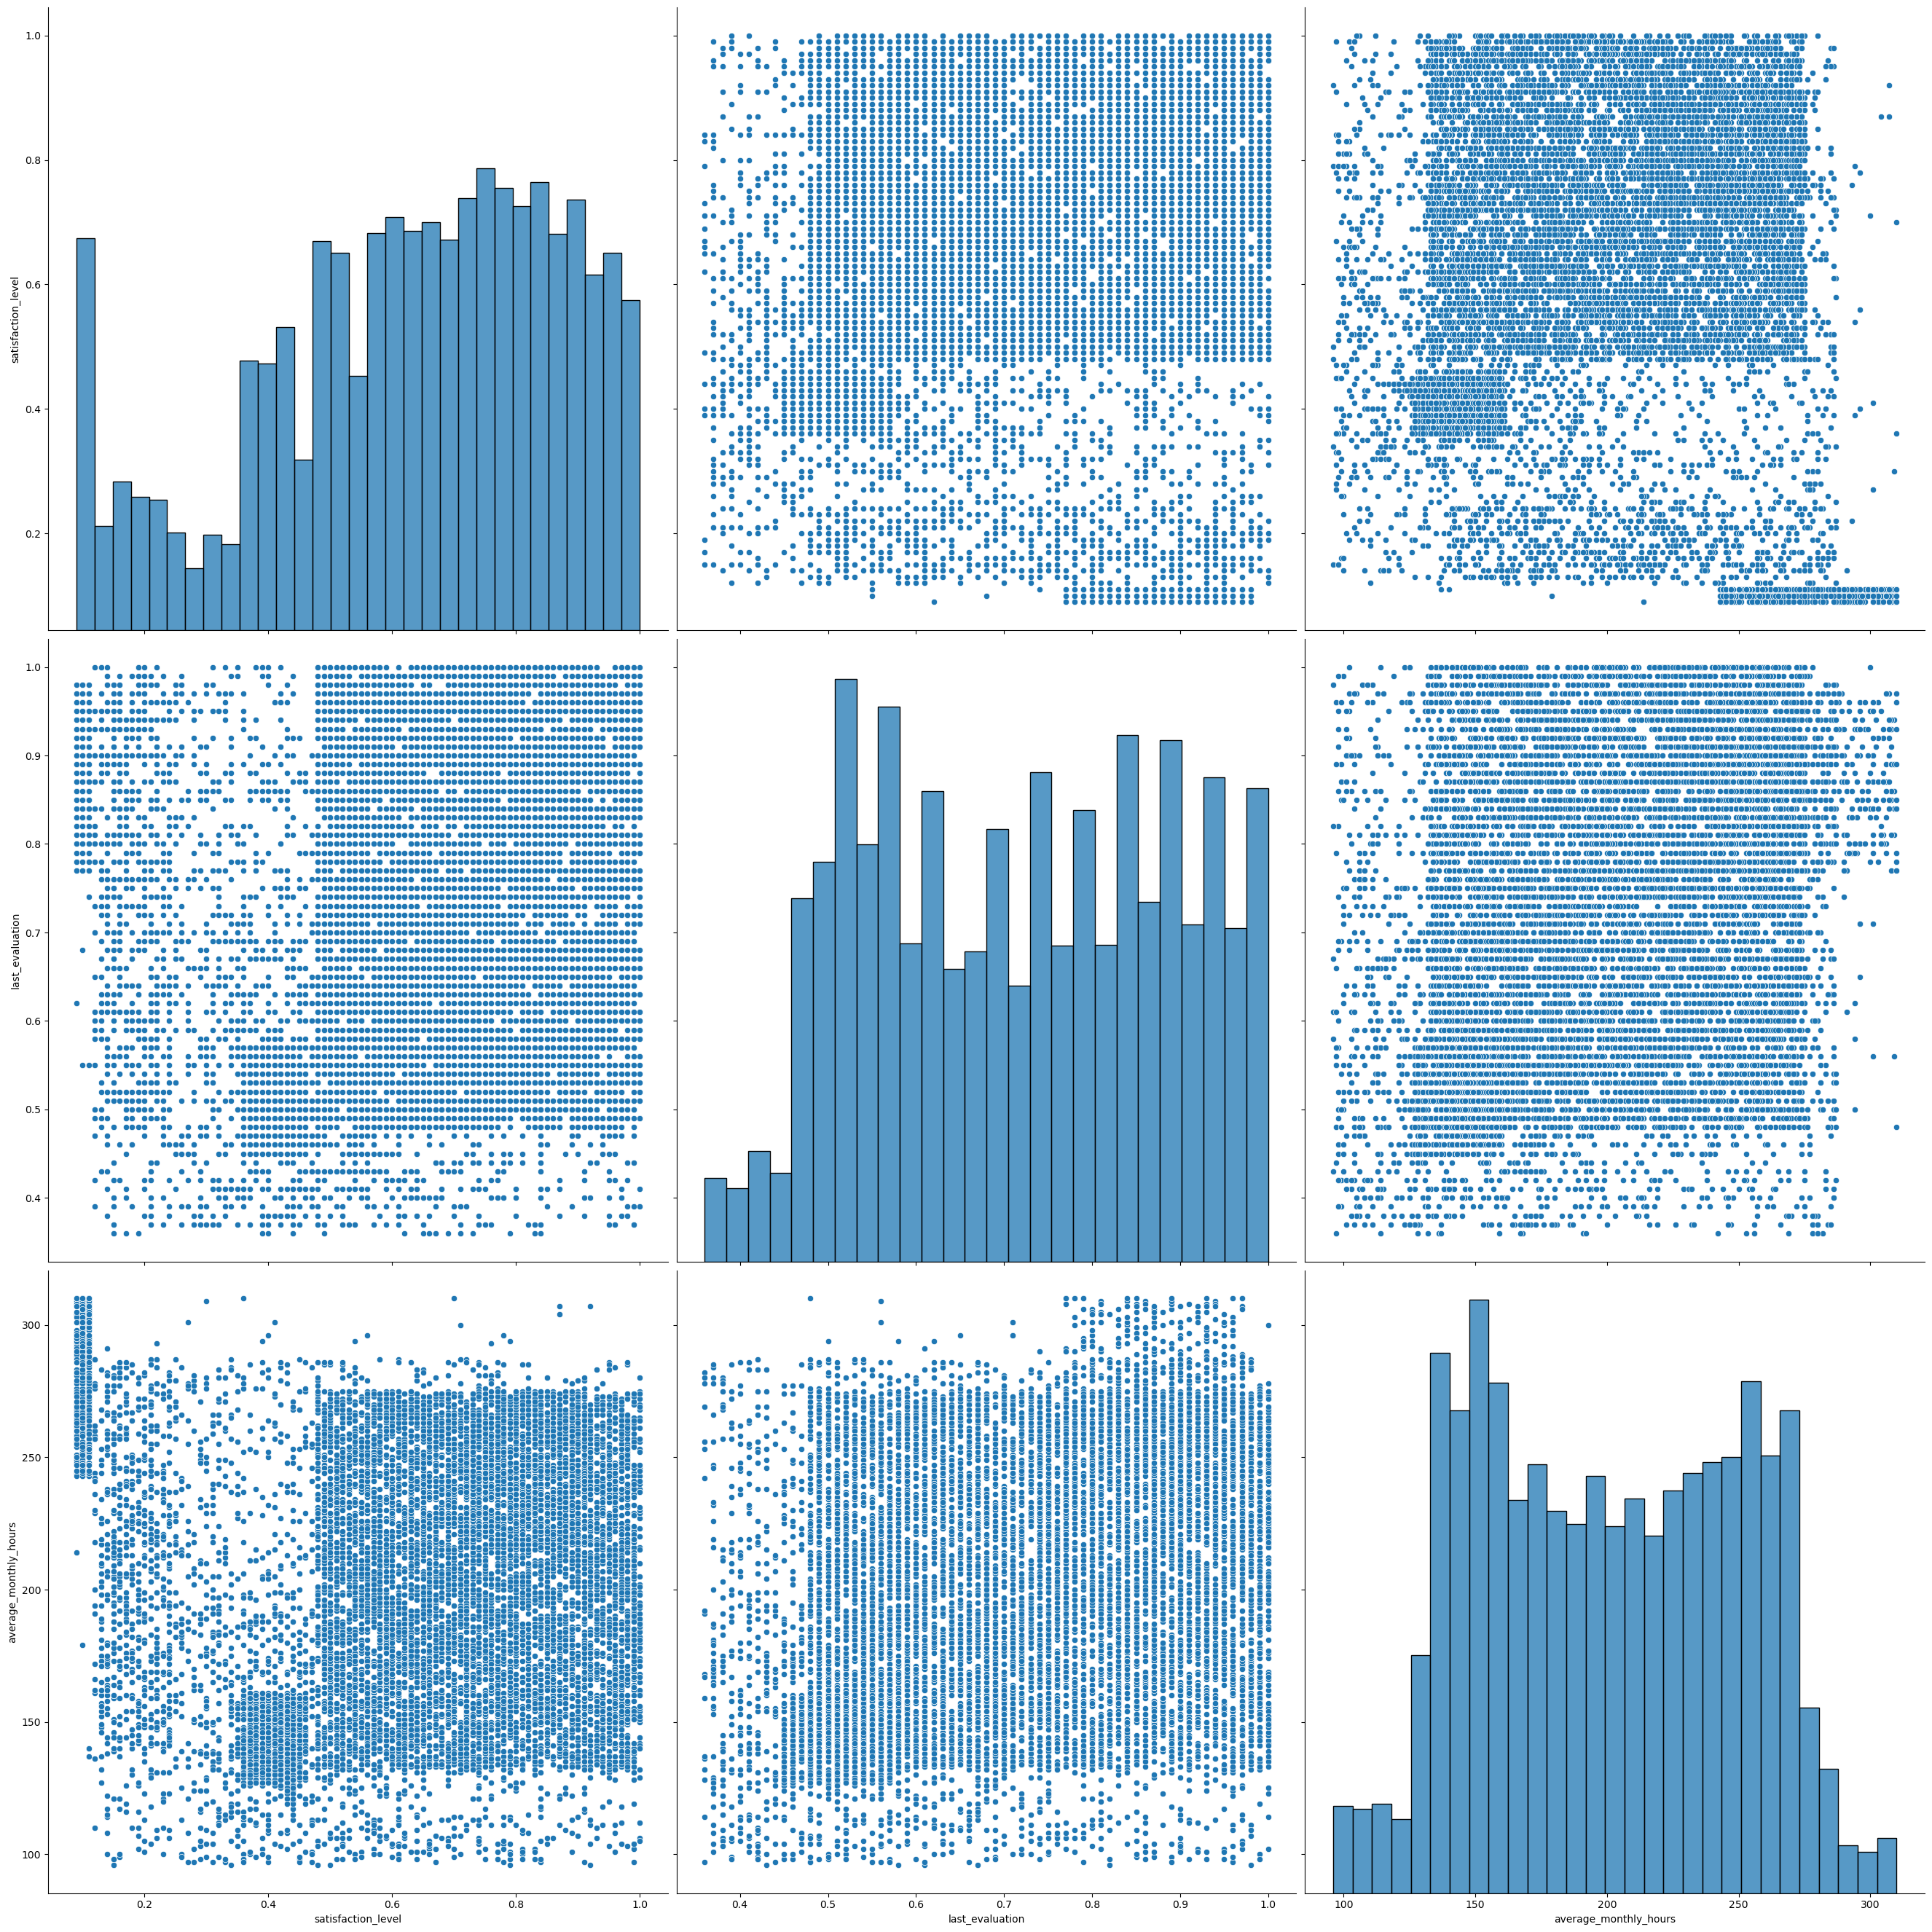

In [109]:
# Exploring if there are relationships between the continuous variables of statisfaction level, last evaluation score, hours worked.

hrdata_pp = hrdata_nodups[["satisfaction_level", "last_evaluation", "average_monthly_hours"]]
sns.pairplot(hrdata_pp, height=9)

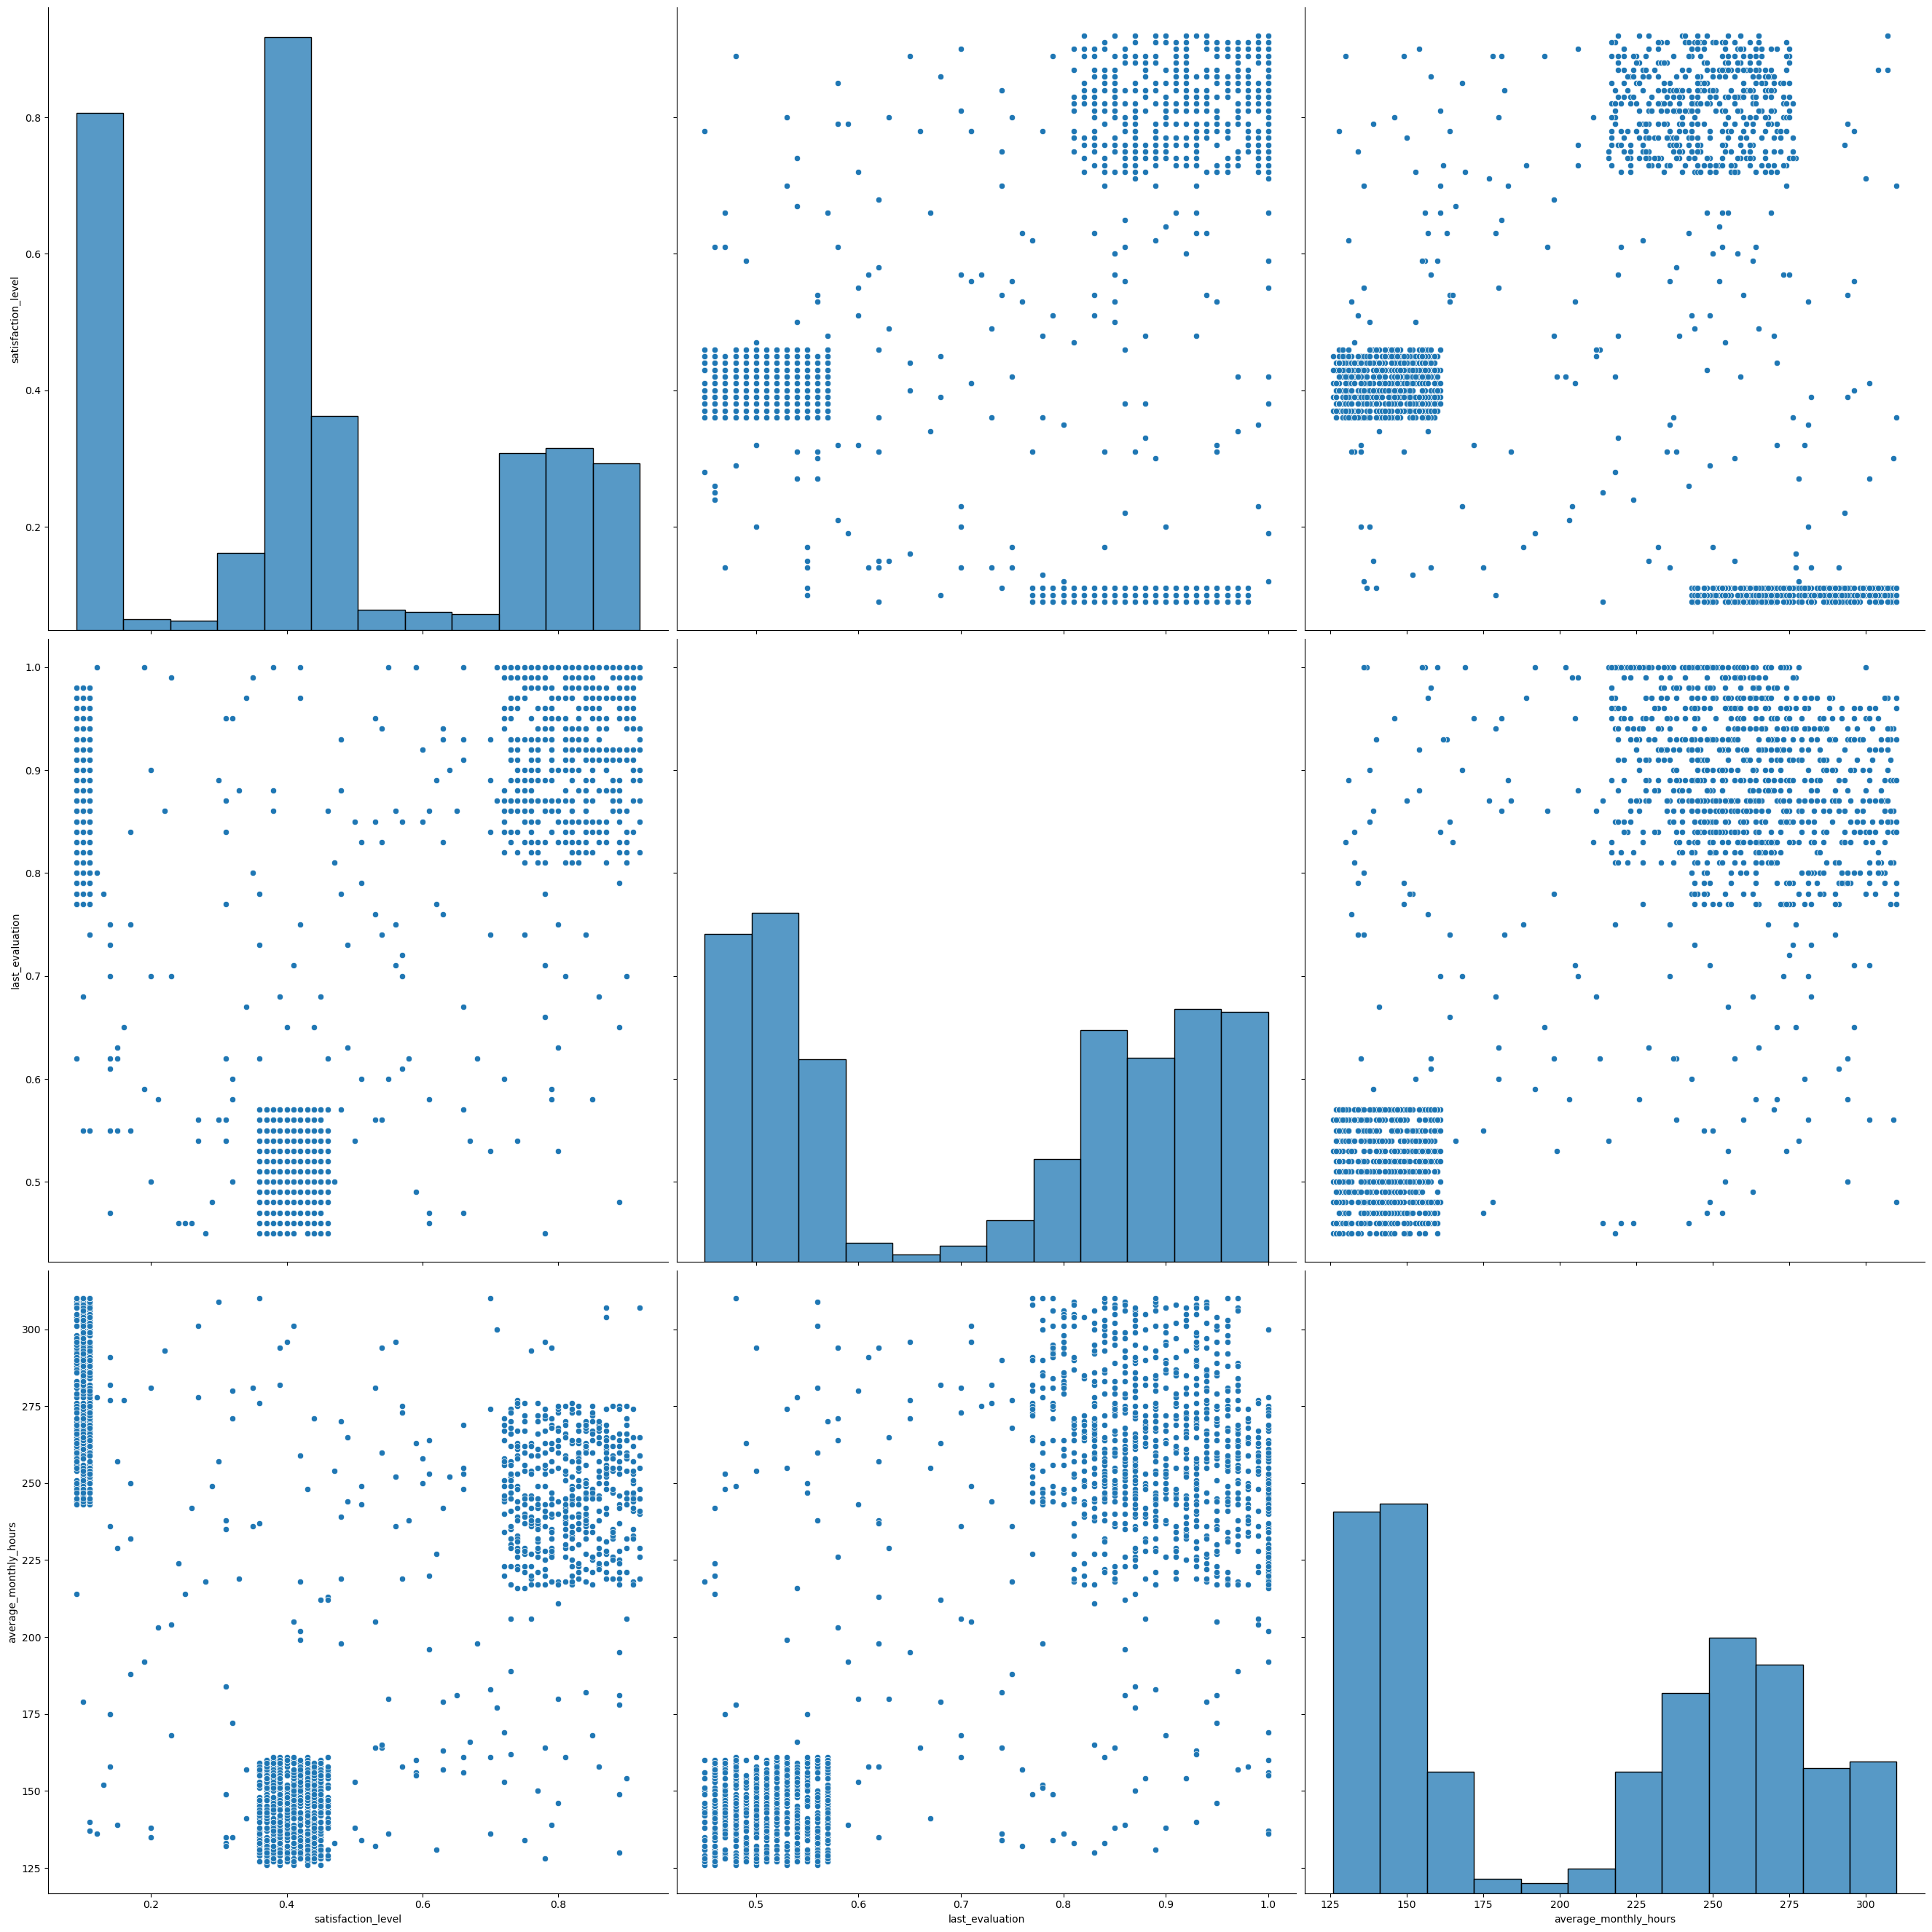

In [110]:
# Create a plot as needed

hrdataleft_pp = hrdata_left[["satisfaction_level", "last_evaluation", "average_monthly_hours"]]
sns.pairplot(hrdataleft_pp, height=9)

#We see clusters forming - perhaps do k-means clustering

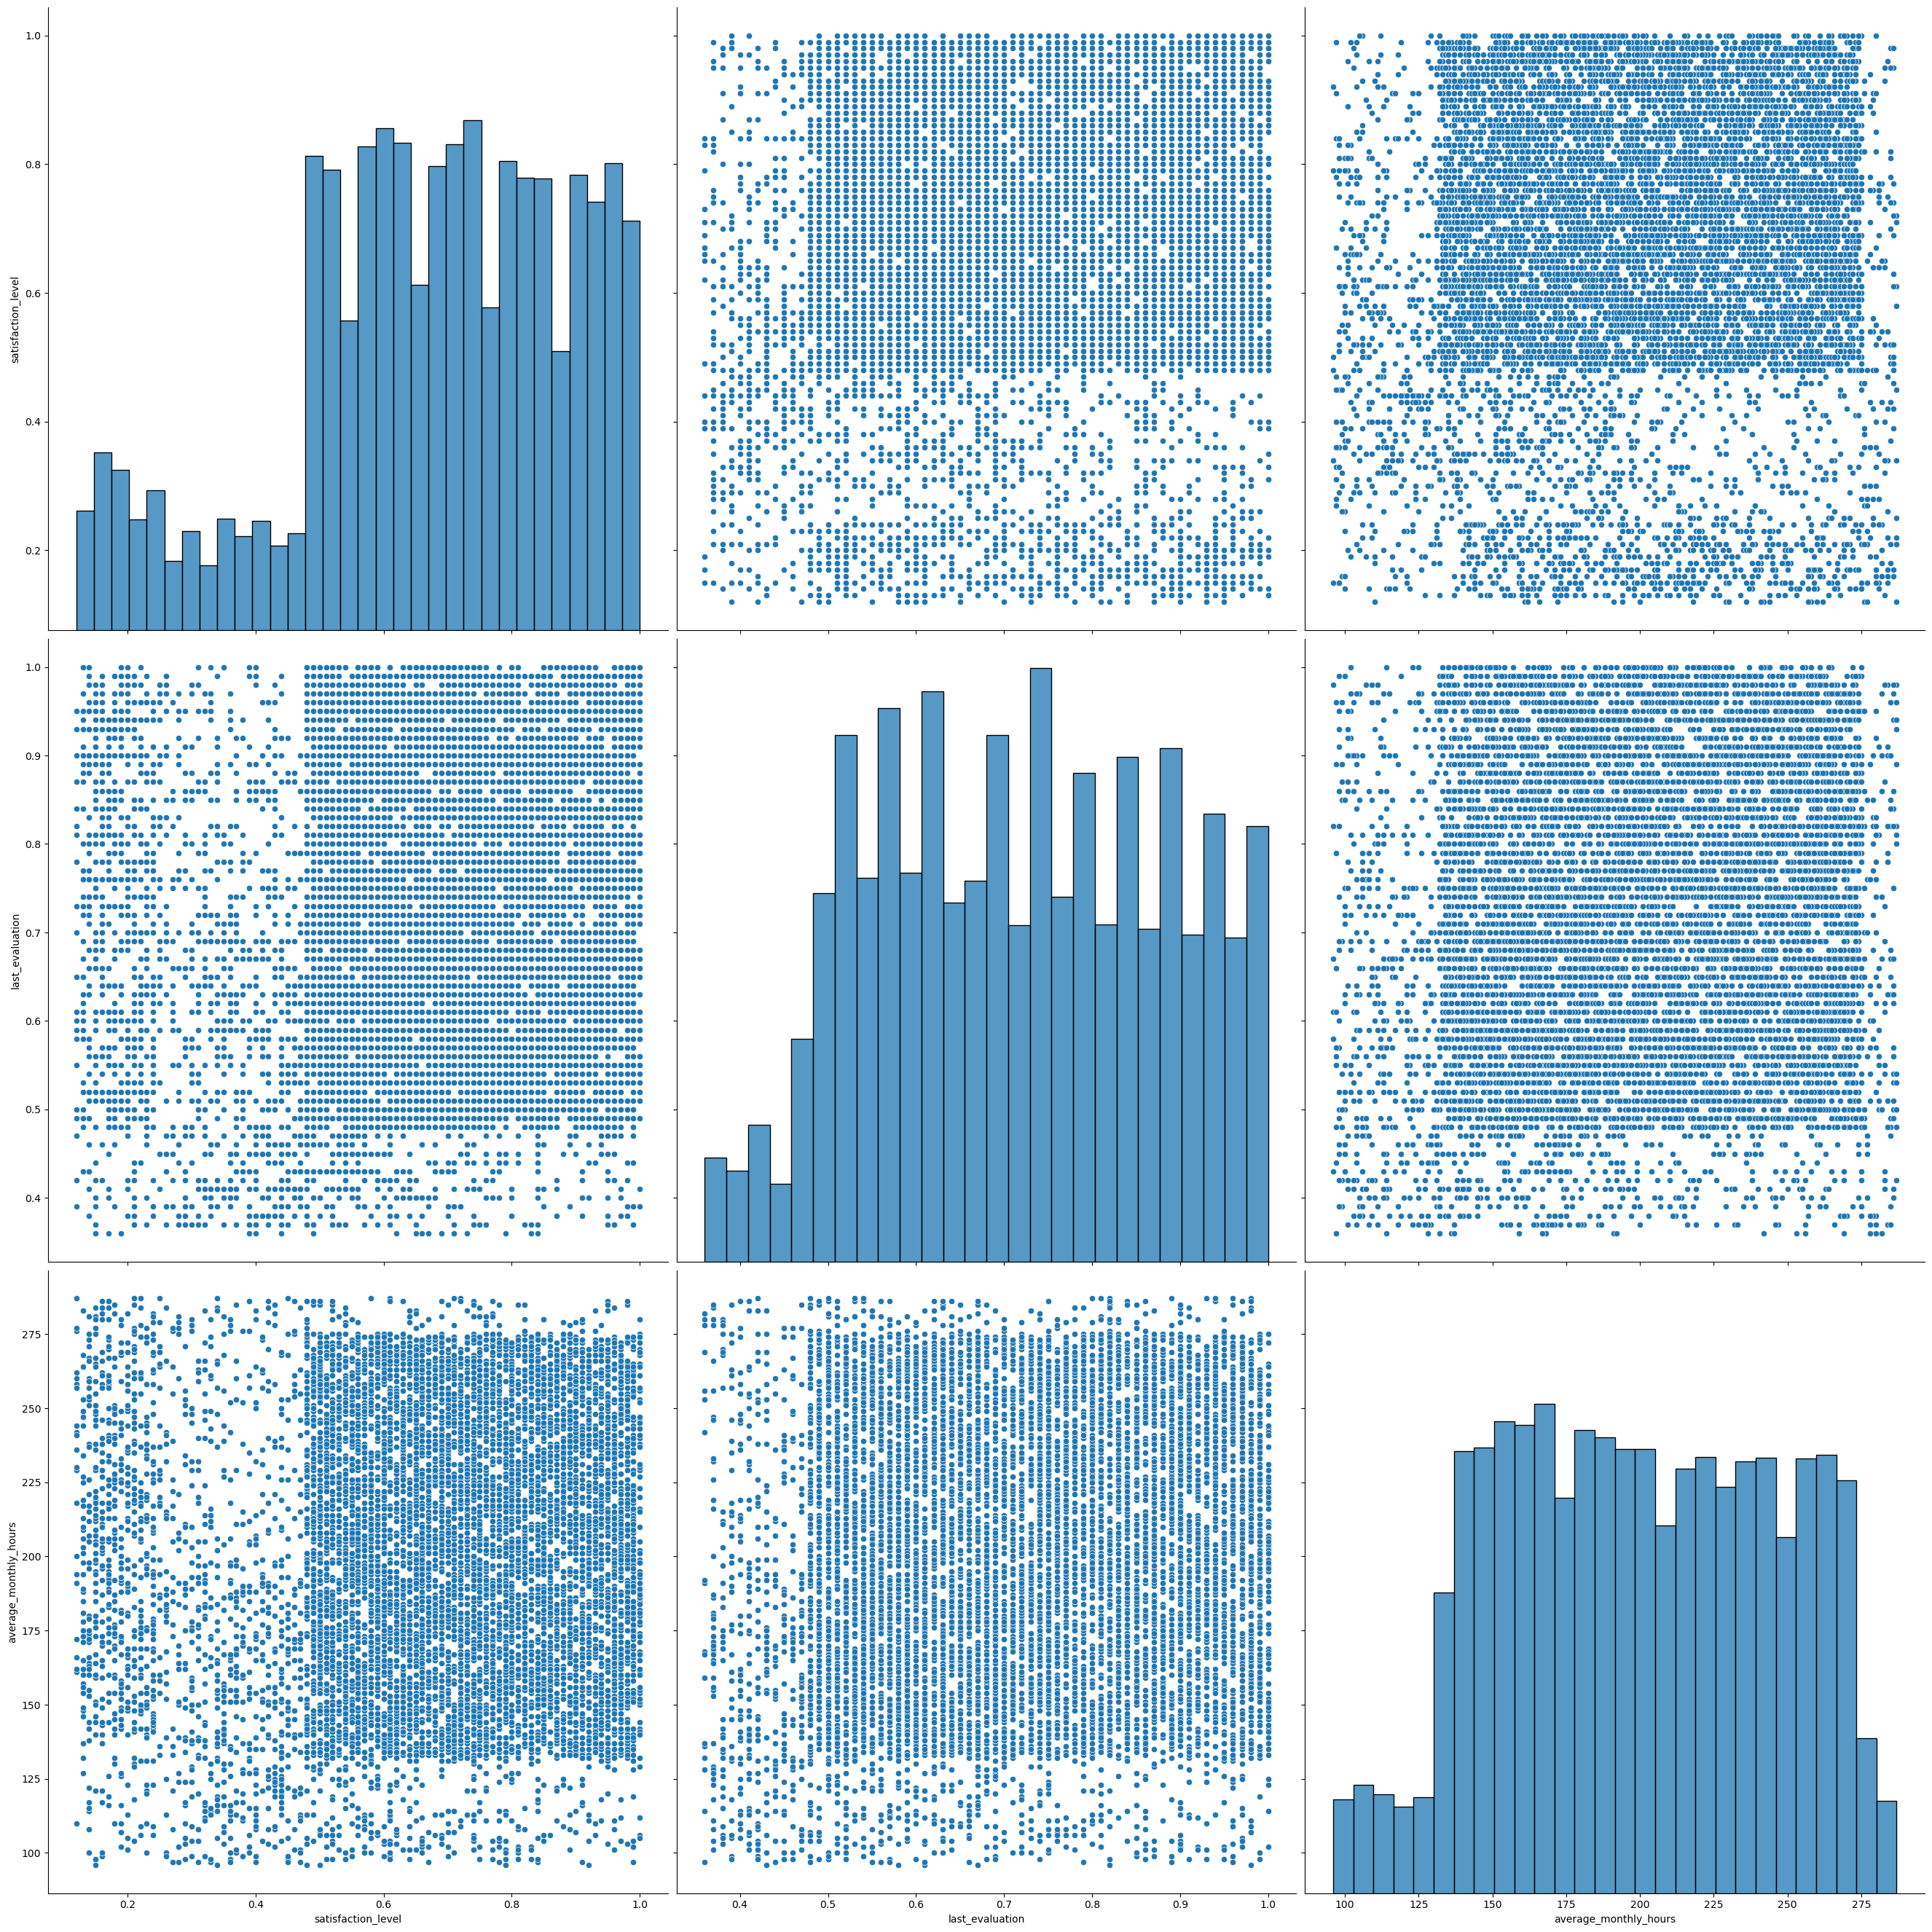

In [111]:
# Create a plot as needed

hrdatastay_pp = hrdata_stay[["satisfaction_level", "last_evaluation", "average_monthly_hours"]]
staypp = sns.pairplot(hrdatastay_pp, height=9)


In the pairplot of the subset with employees who left, we see certain clusters form, which indicates that a k means clustering could be worth doing to analyse this further.

Also noticeable is that the data takes quite an unusual, structured pattern.

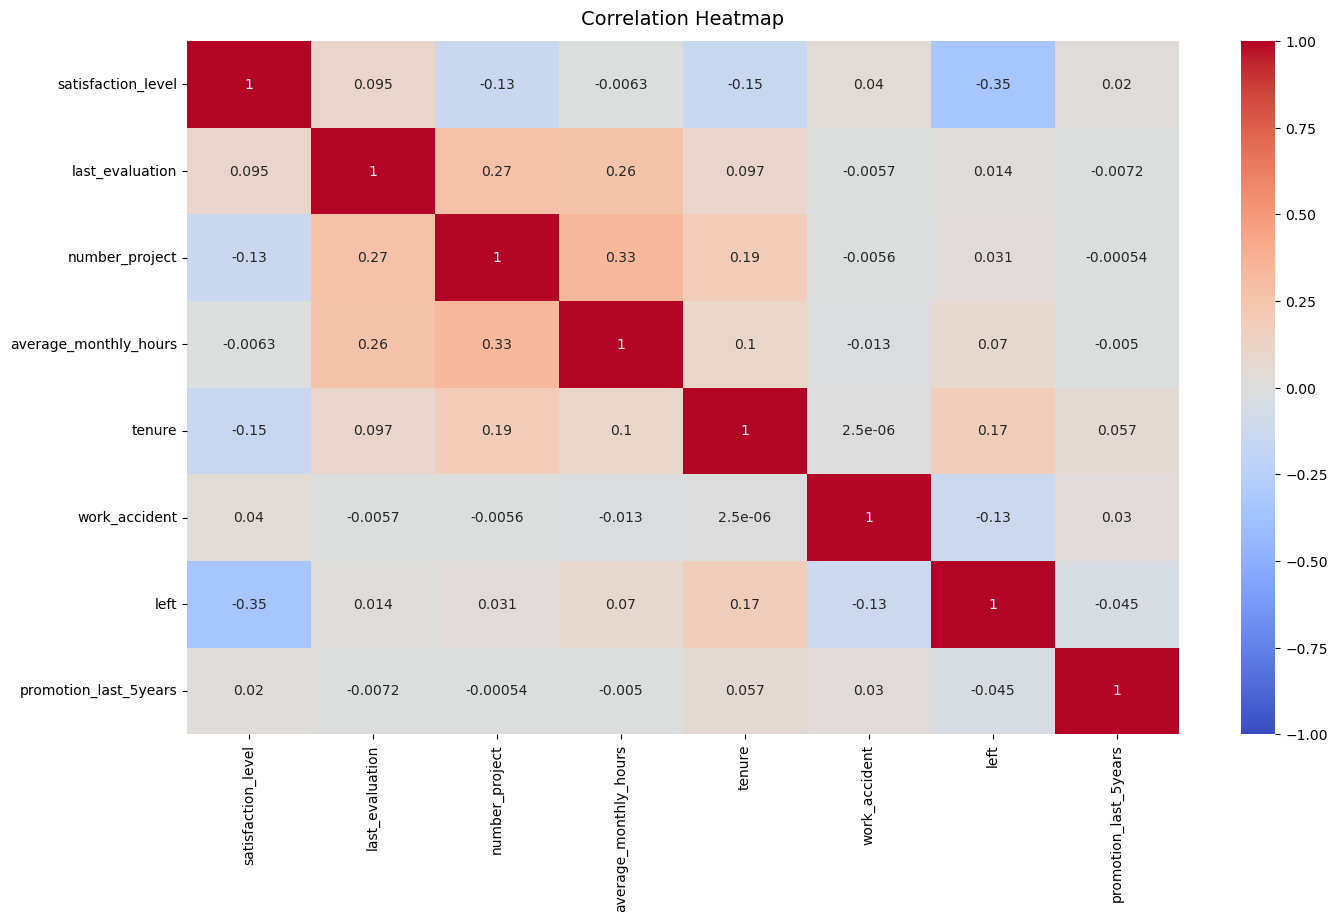

In [112]:
# Create a plot as needed

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(hrdata_nodups.corr(), vmin=-1, vmax=1, annot=True, cmap = sns.color_palette("coolwarm", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Last evaluation, number of projects, and average monthly hours have noticeable positive correlations. Satisfaction level has a strong correlation with left, evidence for hypothesis 1, however, interesting to note that there is not a noticeable correlation between satisfaction level and variables like last evaluation and average monthly hours.


### Deeper exploration between variables

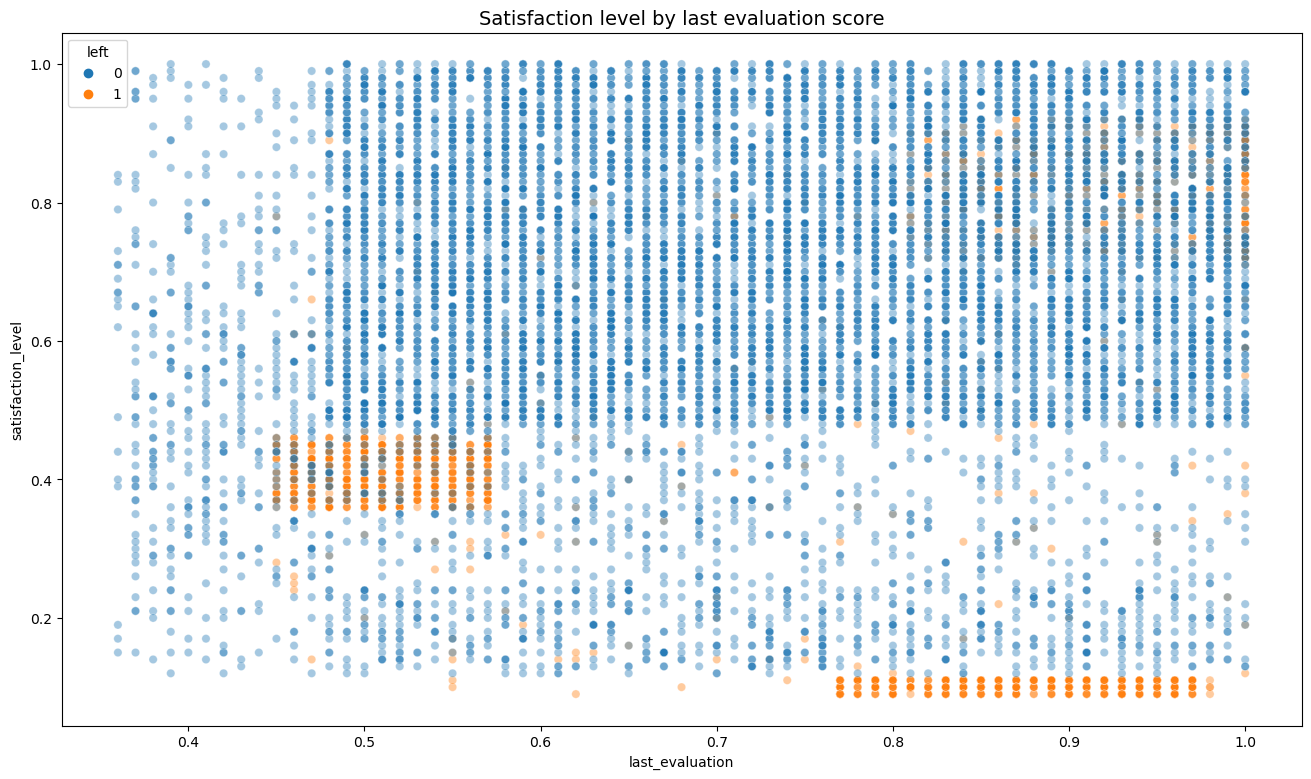

In [113]:
# Exploring relationship between employee sastisfaction and last evaluation scores

plt.figure(figsize=(16, 9))
sns.scatterplot(data=hrdata_nodups, x='last_evaluation', y='satisfaction_level', hue='left', alpha=0.4)
plt.title('Satisfaction level by last evaluation score', fontsize='14');

From the scatter and pair plots that examine this relationship, we see that there are 3 clusters amongst employees who left.

Satisfaction_level (median: 0.64 mean: 0.61) last evaluation score (median: 0.72 mean: 0.72)

1. Evaluation score above mean (above 0.75), but low satisfaction levels (below 0.2)
2. Evaluation score and satisfaction levels both below respective means
3. Evaluation score and satisfaction levels both above respective means

Possible reasons for leaving based on superficial analysis of the 3 clusters are:
1. Good performance, but suffering from burn out as a result, leading to low satisfaction levels
2. Average to below average workers who may have been made redundent, or felt that they had stagnated in the role
3. Of importance to be investigated further, as these are high performers who should be satisfied in their role

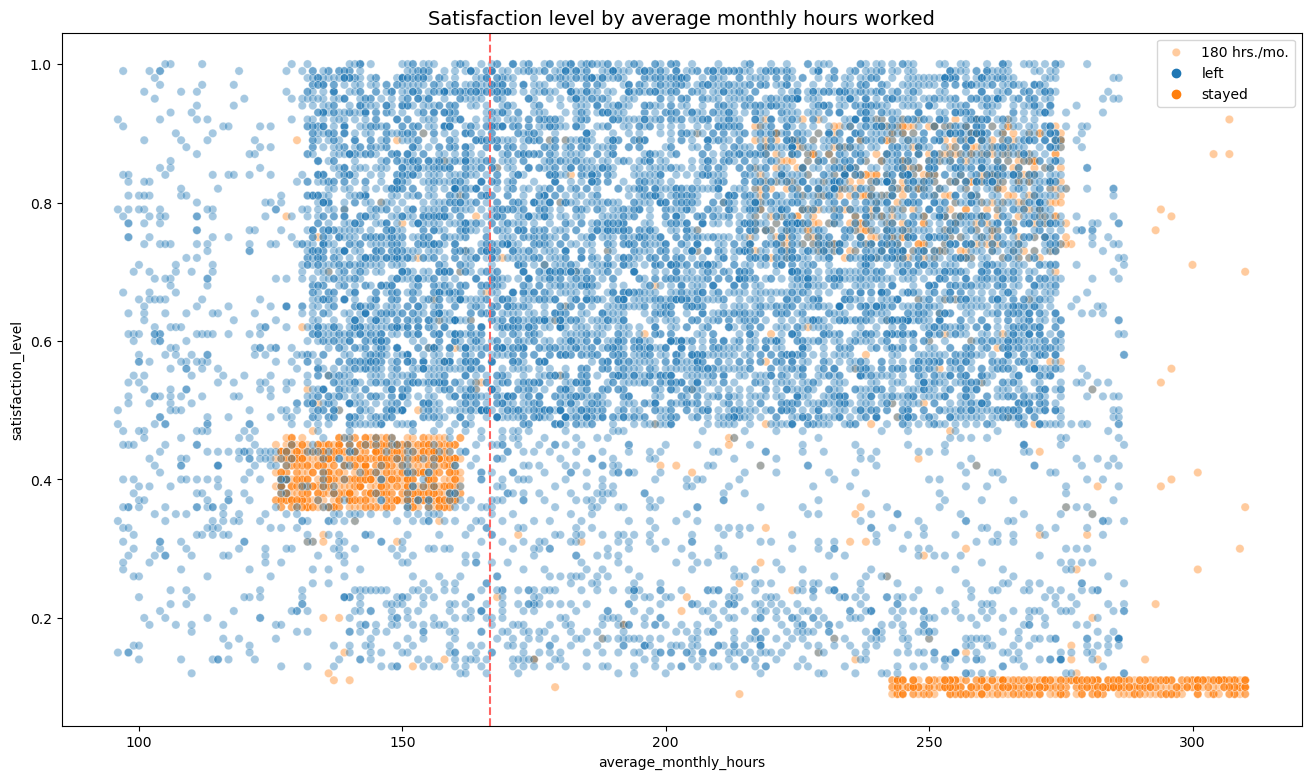

In [114]:
# Exploring relationship between employee sastisfaction and average monthly hours

plt.figure(figsize=(16, 9))
sns.scatterplot(data=hrdata_nodups, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='180 hrs./mo.', ls='--')
plt.legend(labels=['180 hrs./mo.', 'left', 'stayed'])
plt.title('Satisfaction level by average monthly hours worked', fontsize='14');

Applying the assumption that there are usually about 20 weekdays per month, and 9 working hours per day, which would be an extra hour each weekday more than the standard 8 hours workday, the cutoff for time worked would be roughly 180 hours. 

However, in the scatterplot, we see that a large majority of employees, both who stayed and left, work more than 180 hours per month, with feasible, but unlikely numbers clocked.

We observe 3 groups emerge once again;
1. Average monthly hours less than the cutoff, with low satisfaction levels
2. More monthly hours than the cutoff, with relatively high satisfaction levels
3. Many more monthly hours than the cutoff, with very low satisfaction levels

Additionally, employees who clocked the highest average monthly hours all left.

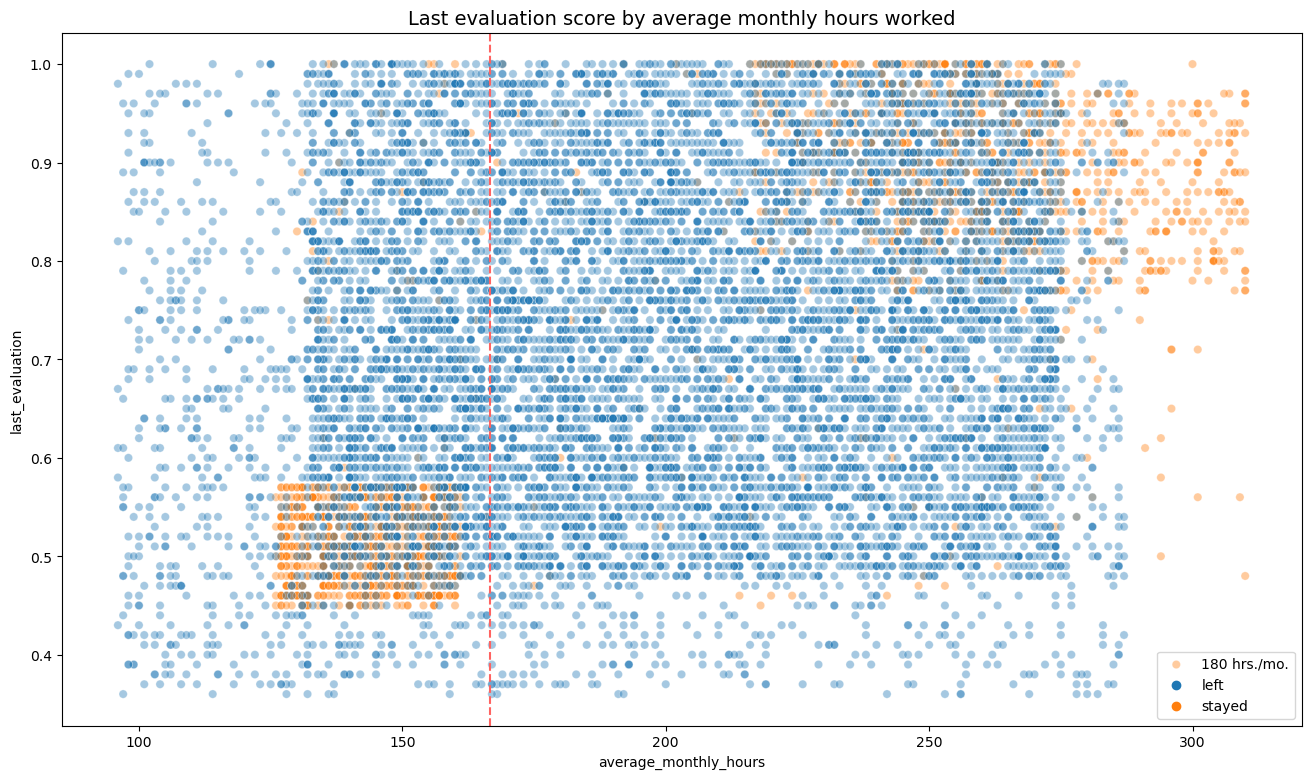

In [115]:
# Exploring relationship between employee sastisfaction and average monthly hours

plt.figure(figsize=(16, 9))
sns.scatterplot(data=hrdata_nodups, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='180 hrs./mo.', ls='--')
plt.legend(labels=['180 hrs./mo.', 'left', 'stayed'])
plt.title('Last evaluation score by average monthly hours worked', fontsize='14');

Looking last evaluation scores in relation to average monthly hours, similar to satisfaction level, we do not see a clear and direct relationship between the 2 variables, but again, we see 2 clusters form amongst employees who left.
1. Below the cutoff average monthly hours, and relatively low evaluation scores
2. Significantly higher than the average monthly hours cutoff, and high last evaluation scores.

<AxesSubplot:xlabel='average_monthly_hours', ylabel='number_project'>

Text(0.5, 1.0, 'Monthly hours by number of projects')

<AxesSubplot:xlabel='number_project', ylabel='Count'>

Text(0.5, 1.0, 'Number of projects histogram')

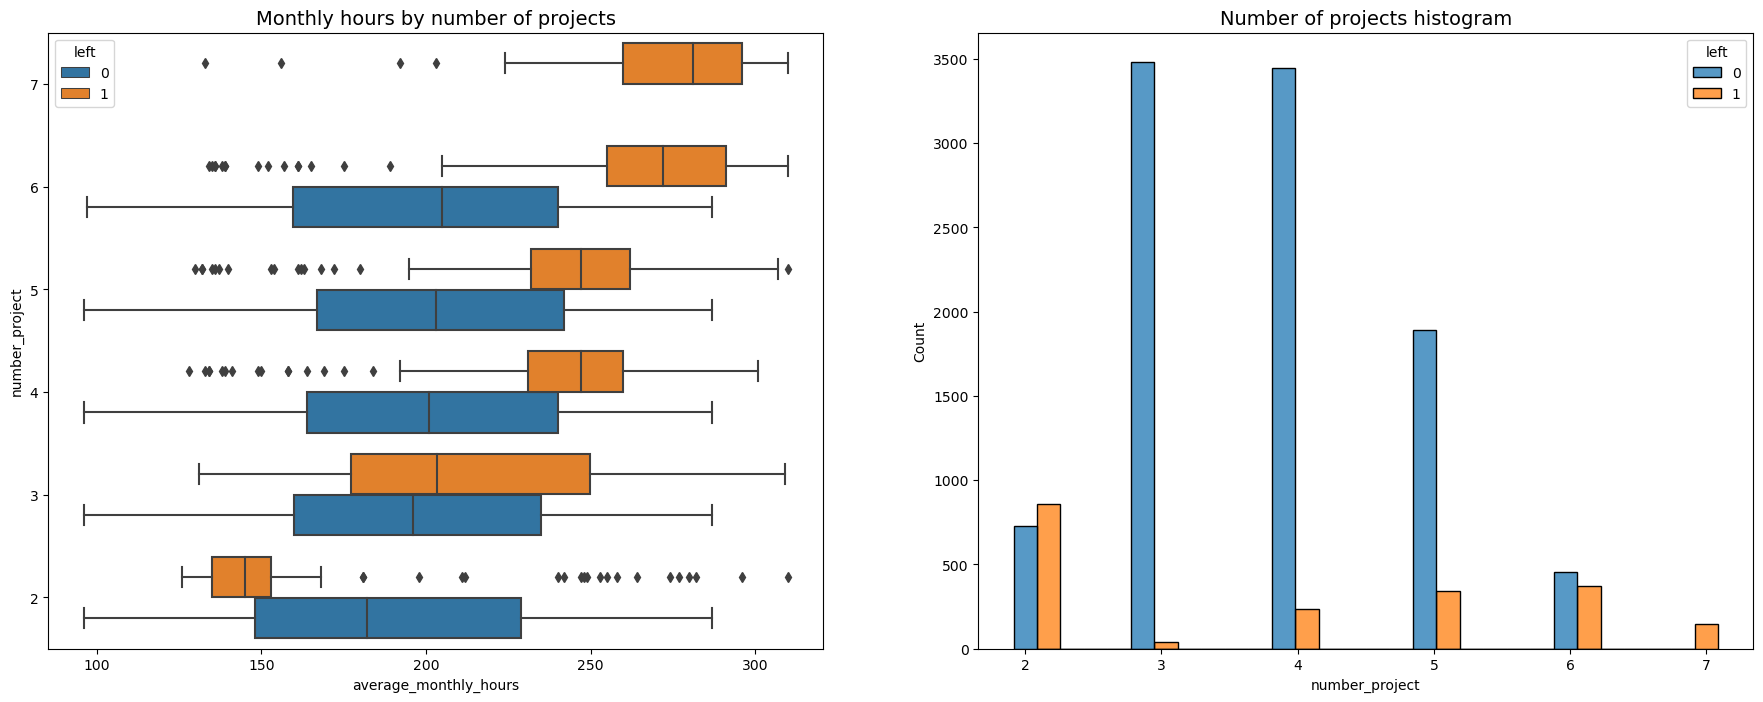

In [116]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Boxplots
sns.boxplot(data=hrdata_nodups, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Histogram
sns.histplot(data=hrdata_nodups, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')


plt.show()

Looking at the histogram to see the distribution of number of projects, the following things are noted:
1. The proportion of those who left who had 2 projects is high compared to having more projects.
2. For 2 projects, there were greater numbers who left than stayed, which is of note due to the 1:5 ratio.
3. For 6 projects, the number of those who stayed and left are almost the same.
4. and that all employees who had 7 projects would leave the company.

Looking at the boxplot to examine the relationship between number of projects and average monthly hours worked, the following are noted:
1. For employees with 2 projects, those who left clocked in fewer hours than those who stayed.
2. From 3 projects onwards, and particularly for 6 projects, those who left tended to clock in more hours than those who stayed.
3. The findings of 2 projects and 6 projects are even more convincing given that there are almost equal numbers of stayed and left for both. 

Based on these findings, we note that a sizeable number of those who left had the minimum number of projects (2) prior to leaving, which could be due to being put on fewer projects in their notice period, or it could be a sign of redundency or it could be due to poor performance. Further analysis or input from relevant stakeholder or SME is needed for better understanding.

Another key finding is that for more than 2 projects, those who left tended to clock in more hours, which may suggest overwork as a cause for disatisfaction and departure. In order to examine this cause, we can plot average monthly hours based on whether they left or not.

<AxesSubplot:xlabel='last_evaluation', ylabel='number_project'>

Text(0.5, 1.0, 'Monthly hours by number of projects')

<AxesSubplot:xlabel='number_project', ylabel='Count'>

Text(0.5, 1.0, 'Number of projects histogram')

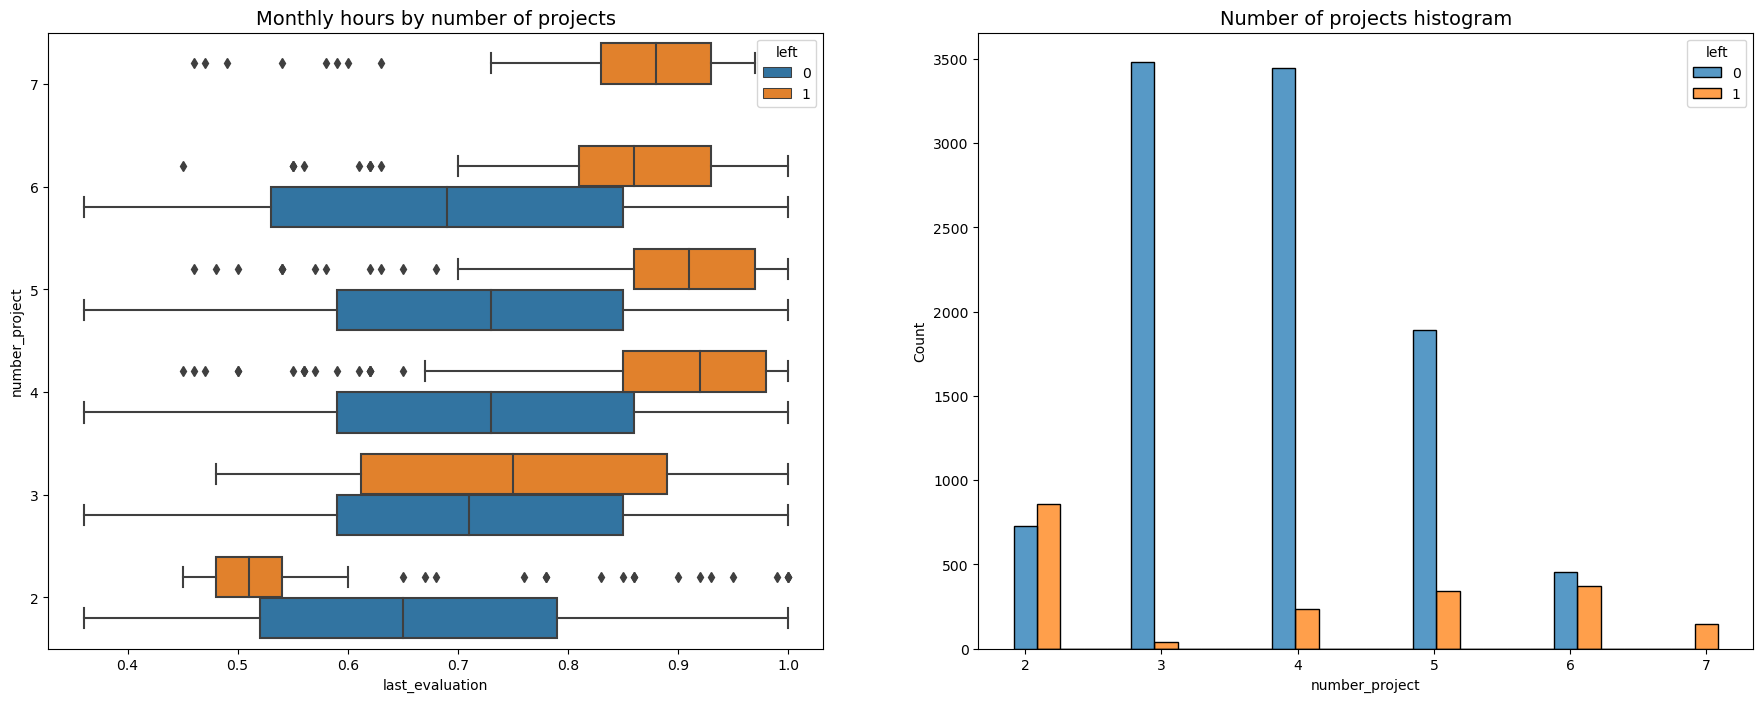

In [117]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Boxplots
sns.boxplot(data=hrdata_nodups, x='last_evaluation', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Histogram
sns.histplot(data=hrdata_nodups, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')


plt.show()

It appears that the more projects an employee takes on, the more likely they are to have a higher last evaluation score, up until they have 6 projects and onwards. This is true for both employees who stayed and left, and may suggest that having too many projects would affect performance, and perhaps burnout.

One potential recommendation is to limit the number of projects an employee can be assigned to / have to take on.

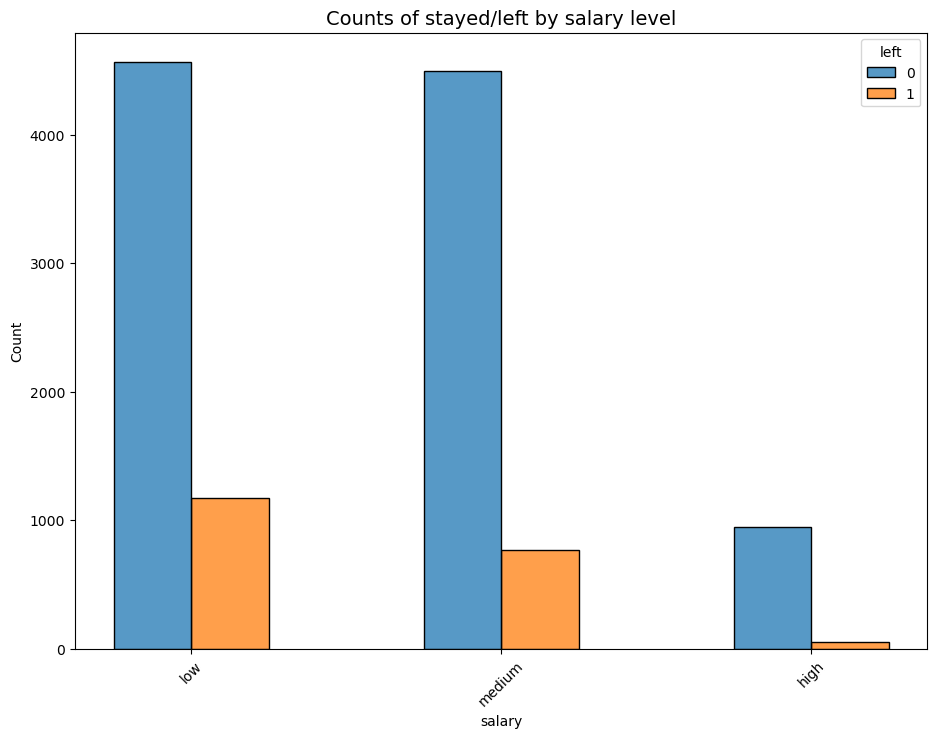

In [118]:
# Examining if salary has an effect on whether an employee leaves or not
plt.figure(figsize=(11,8))
sns.histplot(data=hrdata_nodups, x='salary', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by salary level', fontsize=14);

Highest proportion of leavers are employees who earn a low salary, which might be due to leaving for progression.
Further analysis and consultation is needed.

<Figure size 1100x800 with 0 Axes>

<AxesSubplot:xlabel='department', ylabel='Count'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Department breakdown histogram')

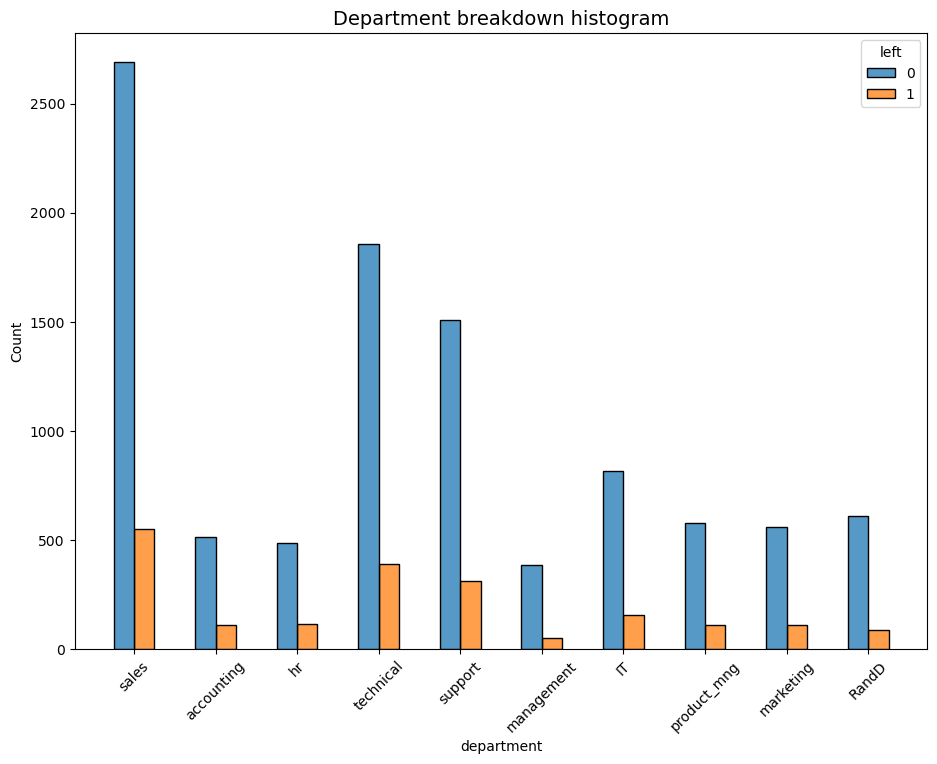

In [119]:
plt.figure(figsize=(11,8))
depstay = hrdata_nodups[hrdata_nodups['left']==0]['department']
depleft = hrdata_nodups[hrdata_nodups['left']==1]['department']
sns.histplot(data=hrdata_nodups, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Department breakdown histogram', fontsize='14')

No department had a skewed proportion of employees who left rather than stayed.

### Insights

Key insights:
1. There are relationships between satisfaction levels, last evaluation score, and average monthly hours worked.
2. A high number of employees who had many projects and high working hours left, which could be due to burn out.
3. A sizeable portion of employees who left had fewer projects and lower working hours before they left, and could have been fired, or reassigned projects due to notice period.
4. Of great interest is the sizeable cluster of employees who scored high evaluation scores, and reflected high satisfaction levels, as they can be seen as valued employees who left. This may be due to things like poaching from other companies, and investing further would be very beneficial.

## Step 3. Model Building, Step 4. Results and Evaluation


### Identify the type of prediction task.

Predicting if an employee left the company based on survey results. Therefore it is binary classification.


### Identify the types of models most appropriate for this task.

As the dependent variable is categorical, possible models include Logistic Regression or Tree-based models. For this project, the tree-based models of Random Forest and XGBoost will be created, and their results compared.

### Model preparation

In [120]:
# Convert the object predictor variables to numerical dummies.
hrgetdummies = pd.get_dummies(hrdata_nodups, 
                                         columns=['left','department', 'salary'])


In [121]:
hrgetdummies.head(10)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   
6                0.10             0.77               6                    247   
7                0.92             0.85               5                    259   
8                0.89             1.00               5                    224   
9                0.42             0.53               2                    142   

   tenure  work_accident  promotion_last_5years  left_0  left_1  \
0       3              0                      0       0       1   
1       6              0                      0       0       1   
2       4              0                      0       0       1   
3       5              0                      0       0       1   
4       3              0                      0       0       1   
5       3              0                      0       0       1   
6       4              0                      0       0       1   
7       5              0                      0       0       1   
8       5              0                      0       0       1   
9       3              0                      0       0       1   

   department_IT  ...  department_hr  department_management  \
0              0  ...              0                      0   
1              0  ...              0                      0   
2              0  ...              0                      0   
3              0  ...              0                      0   
4              0  ...              0                      0   
5              0  ...              0                      0   
6              0  ...              0                      0   
7              0  ...              0                      0   
8              0  ...              0                      0   
9              0  ...              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   
5                     0                       0                 1   
6                     0                       0                 1   
7                     0                       0                 1   
8                     0                       0                 1   
9                     0                       0                 1   

   department_support  department_technical  salary_high  salary_low  \
0                   0                     0            0           1   
1                   0                     0            0           0   
2                   0                     0            0           0   
3                   0                     0            0           1   
4                   0                     0            0           1   
5                   0                     0            0           1   
6                   0                     0            0           1   
7                   0                     0            0           1   
8                   0                     0            0           1   
9                   0                     0            0           1   

   salary_medium  
0              0  
1              1  
2              1  
3              0  
4              0  
5           

In [122]:
# Isolate target and predictor variables

y = hrgetdummies['left_1']

X = hrgetdummies.drop(['left_1', 'left_0'], axis = 1)

### Model Building - Random Forest

In [123]:
# Separate into train, validate, test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

In [124]:
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [125]:
# Create list of split indices.

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [126]:
# Instantiate model.


rf = RandomForestClassifier(random_state=0)

In [127]:
# Search over specified parameters.


rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

In [128]:
%%time

# Fit the model.


rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits
Wall time: 18.9 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [129]:
# Obtain optimal parameters.

rf_val.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

### Model Evaluation - Random Forest

In [130]:
# Use optimal parameters on GridSearchCV.

rf_opt = RandomForestClassifier(n_estimators = 100, max_depth = 10, 
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.9, random_state = 0)

In [131]:
# Fit the optimal model.

rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', max_samples=0.9,
                       min_samples_split=0.001, random_state=0)

In [132]:
# Predict on test set.

y_pred = rf_opt.predict(X_test)

### Obtain performance scores

In [133]:
# Random Forest precision scores.

pc_test_rf = precision_score(y_test, y_pred)
print("precision score:", pc_test_rf)

rc_test_rf = recall_score(y_test, y_pred)
print("recall score:",rc_test_rf)

ac_test_rf = accuracy_score(y_test, y_pred)
print("accuracy score:",ac_test_rf)

f1_test_rf = f1_score(y_test, y_pred)
print("F1 score:", f1_test_rf)

precision score: 0.9753914988814317
recall score: 0.923728813559322
accuracy score: 0.9843228819212808
F1 score: 0.9488574537540806


In [134]:
# Create table of results.

evaltable = pd.DataFrame()

evaltable = evaltable.append({'Model': "Tuned Random Forest",
                        'F1':  f1_test_rf,
                        'Recall': rc_test_rf,
                        'Precision': pc_test_rf,
                        'Accuracy': ac_test_rf
                      },
                        ignore_index=True
                    )
evaltable

C:\Users\diony\AppData\Local\Temp\ipykernel_26660\3646564031.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaltable = evaltable.append({'Model': "Tuned Random Forest",


Model        F1    Recall  Precision  Accuracy
0  Tuned Random Forest  0.948857  0.923729   0.975391  0.984323

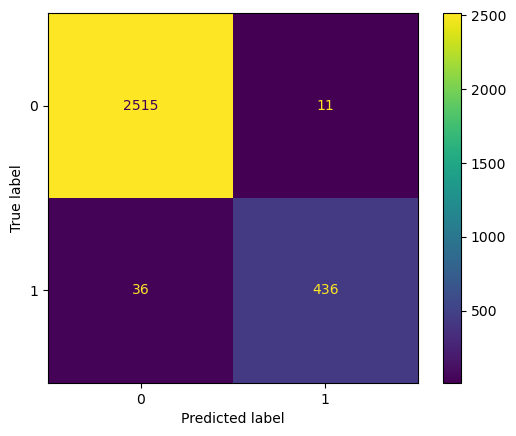

In [135]:
# Generate array of values for confusion matrix
preds = y_pred
cm = confusion_matrix(y_test, preds, labels=rf_opt.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_opt.classes_)
disp.plot();

### Model Building - XGBoost

In [136]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [137]:
# Define xgb to be XGBClassifier.

xgb = XGBClassifier(random_state = 0)

In [138]:
# Define parameters for tuning as `cv_params`.

cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

### Model Evaluation - XGBoost

In [139]:
# Define criteria as `scoring`.

scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [140]:
# Constructing GridSearch.

xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

In [141]:
%%time
# Fit the GridSearch model to training data

xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

Wall time: 8.17 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [142]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 15,
 'subsample': 0.7}

In [143]:
xgb_cv.best_score_

0.9385049194510321

In [144]:
# Apply model to predict on test data

y_pred = xgb_cv.predict(X_test)

In [145]:
# XGBoost Evaluation scores.

ac_score_xg = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score_xg)

pc_score_xg = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score_xg)

rc_score_xg = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score_xg)

f1_score_xg = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score_xg)

accuracy score: 0.9836557705136758
precision score: 0.9668874172185431
recall score: 0.9279661016949152
f1 score: 0.9470270270270271


In [146]:
# Appending XGBoost evaluation scores into table.

evaltable = evaltable.append({'Model': "XGBoost",
                        'F1':  f1_score_xg,
                        'Recall': rc_score_xg,
                        'Precision': pc_score_xg,
                        'Accuracy': ac_score_xg
                      },
                        ignore_index=True
                    )
evaltable

C:\Users\diony\AppData\Local\Temp\ipykernel_26660\148715205.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaltable = evaltable.append({'Model': "XGBoost",


Model        F1    Recall  Precision  Accuracy
0  Tuned Random Forest  0.948857  0.923729   0.975391  0.984323
1              XGBoost  0.947027  0.927966   0.966887  0.983656

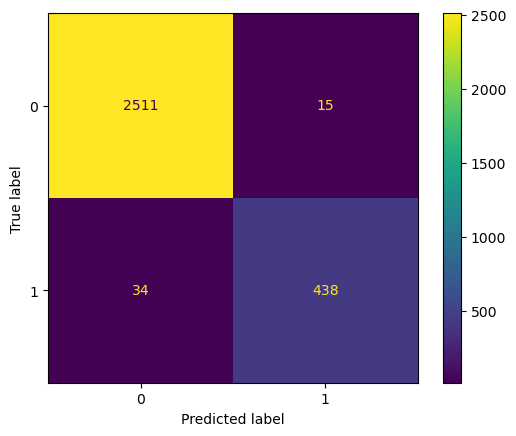

In [147]:
# XGBoost confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

disp.plot()

plt.savefig('confusion_matrix.png')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

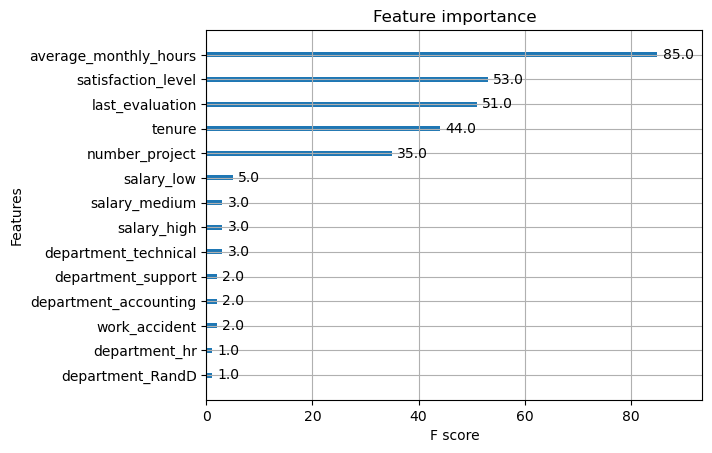

In [148]:
# Feature importance of the predictor variables.

plot_importance(xgb_cv.best_estimator_)

## Step 4. Results and Evaluation




### Summary of model results

<b>Random Forest & XGBoost</b>

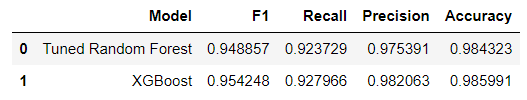

Both models performed very well, with XGBoost marginally outperforming Random Forest.



### Conclusion, Recommendations, Next Steps

As the XGBoost model has performed well, with strong scores across all metrics, in particular, accuracy score, it could be used to predict if an employee might be considering leaving based on their most recent survey results.

Through the analysis of the survey data, as well as the feature importance of the models, we see that satisfaction level, last evaluation, and average monthly hours have the greatest importance in predicting if an employee might leave.

Having done exploratory data analysis into these factors, it was found that one likely reason for employees leaving is being <b> overworked</b>, with more projects, and more hours worked in the month.

Also of note is a cluster of employees who had high last evaluation scores, and high satisfaction levels, but left the company. These employees could be seen as the high value employees that Salifort Motors is aiming to retain, who were also happy at the company, but may have left for extraneous reasons, such as poaching from other companies.

There was also a cluster of poor performing employees who had lower evaluation scores. Investigation into what might be the cause of their poor performance could also be explored.

#### Next steps
As satisfaction levels and evaluation scores are important factors in whether an employee stays or leaves, other relevant data could be gathered for exploration, and to create models that could predict these 2 factors, in order to identify strong performers, and also to have an earlier indication of which employees may be close to leaving.

An investigation into the company working culture, with overworking at the forefront, and the effects they may have on employee satisfaction/happiness would be pertinent as well.

An investigation can also be conducted into the reasons for leaving amongst employees with high evaluation and satisfaction scores, and also to do additional surveys on employees who are still with the company whose datapoints sit close to the cluster  of those who left.